In [1]:
# Run this cell to import pyspark and to define start_spark() and stop_spark()

import findspark

findspark.init()

import getpass
import pandas
import pyspark
import random
import re

from IPython.display import display, HTML
from pyspark import SparkContext
from pyspark.sql import SparkSession


# Functions used below

def username():
    """Get username with any domain information removed.
    """

    return re.sub('@.*', '', getpass.getuser())


def dict_to_html(d):
    """Convert a Python dictionary into a two column table for display.
    """

    html = []

    html.append(f'<table width="100%" style="width:100%; font-family: monospace;">')
    for k, v in d.items():
        html.append(f'<tr><td style="text-align:left;">{k}</td><td>{v}</td></tr>')
    html.append(f'</table>')

    return ''.join(html)


def show_as_html(df, n=20):
    """Leverage existing pandas jupyter integration to show a spark dataframe as html.
    
    Args:
        n (int): number of rows to show (default: 20)
    """

    display(df.limit(n).toPandas())

    
def display_spark():
    """Display the status of the active Spark session if one is currently running.
    """
    
    if 'spark' in globals() and 'sc' in globals():

        name = sc.getConf().get("spark.app.name")
        
        html = [
            f'<p><b>Spark</b></p>',
            f'<p>The spark session is <b><span style="color:green">active</span></b>, look for <code>{name}</code> under the running applications section in the Spark UI.</p>',
            f'<ul>',
            f'<li><a href="http://mathmadslinux2p.canterbury.ac.nz:8080/" target="_blank">Spark UI</a></li>',
            f'<li><a href="{sc.uiWebUrl}" target="_blank">Spark Application UI</a></li>',
            f'</ul>',
            f'<p><b>Config</b></p>',
            dict_to_html(dict(sc.getConf().getAll())),
            f'<p><b>Notes</b></p>',
            f'<ul>',
            f'<li>The spark session <code>spark</code> and spark context <code>sc</code> global variables have been defined by <code>start_spark()</code>.</li>',
            f'<li>Please run <code>stop_spark()</code> before closing the notebook or restarting the kernel or kill <code>{name}</code> by hand using the link in the Spark UI.</li>',
            f'</ul>',
        ]
        display(HTML(''.join(html)))
        
    else:
        
        html = [
            f'<p><b>Spark</b></p>',
            f'<p>The spark session is <b><span style="color:red">stopped</span></b>, confirm that <code>{username() + " (jupyter)"}</code> is under the completed applications section in the Spark UI.</p>',
            f'<ul>',
            f'<li><a href="http://mathmadslinux2p.canterbury.ac.nz:8080/" target="_blank">Spark UI</a></li>',
            f'</ul>',
        ]
        display(HTML(''.join(html)))


# Functions to start and stop spark

def start_spark(executor_instances=2, executor_cores=1, worker_memory=1, master_memory=1):
    """Start a new Spark session and define globals for SparkSession (spark) and SparkContext (sc).
    
    Args:
        executor_instances (int): number of executors (default: 2)
        executor_cores (int): number of cores per executor (default: 1)
        worker_memory (float): worker memory (default: 1)
        master_memory (float): master memory (default: 1)
    """

    global spark
    global sc

    user = username()
    
    cores = executor_instances * executor_cores
    partitions = cores * 4
    port = 4000 + random.randint(1, 999)

    spark = (
        SparkSession.builder
        .master("spark://masternode2:7077")
        .config("spark.driver.extraJavaOptions", f"-Dderby.system.home=/tmp/{user}/spark/")
        .config("spark.dynamicAllocation.enabled", "false")
        .config("spark.executor.instances", str(executor_instances))
        .config("spark.executor.cores", str(executor_cores))
        .config("spark.cores.max", str(cores))
        .config("spark.executor.memory", f"{worker_memory}g")
        .config("spark.driver.memory", f"{master_memory}g")
        .config("spark.driver.maxResultSize", "0")
        .config("spark.sql.shuffle.partitions", str(partitions))
        .config("spark.ui.port", str(port))
        .appName(user + " (jupyter)")
        .getOrCreate()
    )
    sc = SparkContext.getOrCreate()
    
    display_spark()

    
def stop_spark():
    """Stop the active Spark session and delete globals for SparkSession (spark) and SparkContext (sc).
    """

    global spark
    global sc

    if 'spark' in globals() and 'sc' in globals():

        spark.stop()

        del spark
        del sc

    display_spark()


# Make css changes to improve spark output readability

html = [
    '<style>',
    'pre { white-space: pre !important; }',
    'table.dataframe td { white-space: nowrap !important; }',
    'table.dataframe thead th:first-child, table.dataframe tbody th { display: none; }',
    '</style>',
]
display(HTML(''.join(html)))# Run this cell to import pyspark and to define start_spark() and stop_spark()

import findspark

findspark.init()

import getpass
import pandas
import pyspark
import random
import re

from IPython.display import display, HTML
from pyspark import SparkContext
from pyspark.sql import SparkSession


# Functions used below

def username():
    """Get username with any domain information removed.
    """

    return re.sub('@.*', '', getpass.getuser())


def dict_to_html(d):
    """Convert a Python dictionary into a two column table for display.
    """

    html = []

    html.append(f'<table width="100%" style="width:100%; font-family: monospace;">')
    for k, v in d.items():
        html.append(f'<tr><td style="text-align:left;">{k}</td><td>{v}</td></tr>')
    html.append(f'</table>')

    return ''.join(html)


def show_as_html(df, n=20):
    """Leverage existing pandas jupyter integration to show a spark dataframe as html.
    
    Args:
        n (int): number of rows to show (default: 20)
    """

    display(df.limit(n).toPandas())

    
def display_spark():
    """Display the status of the active Spark session if one is currently running.
    """
    
    if 'spark' in globals() and 'sc' in globals():

        name = sc.getConf().get("spark.app.name")
        
        html = [
            f'<p><b>Spark</b></p>',
            f'<p>The spark session is <b><span style="color:green">active</span></b>, look for <code>{name}</code> under the running applications section in the Spark UI.</p>',
            f'<ul>',
            f'<li><a href="http://mathmadslinux2p.canterbury.ac.nz:8080/" target="_blank">Spark UI</a></li>',
            f'<li><a href="{sc.uiWebUrl}" target="_blank">Spark Application UI</a></li>',
            f'</ul>',
            f'<p><b>Config</b></p>',
            dict_to_html(dict(sc.getConf().getAll())),
            f'<p><b>Notes</b></p>',
            f'<ul>',
            f'<li>The spark session <code>spark</code> and spark context <code>sc</code> global variables have been defined by <code>start_spark()</code>.</li>',
            f'<li>Please run <code>stop_spark()</code> before closing the notebook or restarting the kernel or kill <code>{name}</code> by hand using the link in the Spark UI.</li>',
            f'</ul>',
        ]
        display(HTML(''.join(html)))
        
    else:
        
        html = [
            f'<p><b>Spark</b></p>',
            f'<p>The spark session is <b><span style="color:red">stopped</span></b>, confirm that <code>{username() + " (jupyter)"}</code> is under the completed applications section in the Spark UI.</p>',
            f'<ul>',
            f'<li><a href="http://mathmadslinux2p.canterbury.ac.nz:8080/" target="_blank">Spark UI</a></li>',
            f'</ul>',
        ]
        display(HTML(''.join(html)))


# Functions to start and stop spark

def start_spark(executor_instances=2, executor_cores=1, worker_memory=1, master_memory=1):
    """Start a new Spark session and define globals for SparkSession (spark) and SparkContext (sc).
    
    Args:
        executor_instances (int): number of executors (default: 2)
        executor_cores (int): number of cores per executor (default: 1)
        worker_memory (float): worker memory (default: 1)
        master_memory (float): master memory (default: 1)
    """

    global spark
    global sc

    user = username()
    
    cores = executor_instances * executor_cores
    partitions = cores * 4
    port = 4000 + random.randint(1, 999)

    spark = (
        SparkSession.builder
        .master("spark://masternode2:7077")
        .config("spark.driver.extraJavaOptions", f"-Dderby.system.home=/tmp/{user}/spark/")
        .config("spark.dynamicAllocation.enabled", "false")
        .config("spark.executor.instances", str(executor_instances))
        .config("spark.executor.cores", str(executor_cores))
        .config("spark.cores.max", str(cores))
        .config("spark.executor.memory", f"{worker_memory}g")
        .config("spark.driver.memory", f"{master_memory}g")
        .config("spark.driver.maxResultSize", "0")
        .config("spark.sql.shuffle.partitions", str(partitions))
        .config("spark.ui.port", str(port))
        .appName(user + " (jupyter)")
        .getOrCreate()
    )
    sc = SparkContext.getOrCreate()
    
    display_spark()

    
def stop_spark():
    """Stop the active Spark session and delete globals for SparkSession (spark) and SparkContext (sc).
    """

    global spark
    global sc

    if 'spark' in globals() and 'sc' in globals():

        spark.stop()

        del spark
        del sc

    display_spark()


# Make css changes to improve spark output readability

html = [
    '<style>',
    'pre { white-space: pre !important; }',
    'table.dataframe td { white-space: nowrap !important; }',
    'table.dataframe thead th:first-child, table.dataframe tbody th { display: none; }',
    '</style>',
]
display(HTML(''.join(html)))

In [7]:
# Run this cell to start a spark session in this notebook

start_spark(executor_instances=2, executor_cores=1, worker_memory=1, master_memory=1)

spark.app.name,kda115 (jupyter)
spark.dynamicAllocation.enabled,false
spark.app.id,app-20241024091930-0121
spark.sql.warehouse.dir,file:/users/home/kda115/Assignment%2002/Assignment_Notebook/Recommendation/spark-warehouse
spark.master,spark://masternode2:7077
spark.executor.id,driver
spark.app.startTime,1729714769927
spark.driver.memory,1g
spark.driver.host,mathmadslinux2p.canterbury.ac.nz
spark.driver.port,43983
spark.executor.memory,1g


In [8]:
# Write your imports and code here or insert cells below

from pyspark.sql import Row, DataFrame, Window, functions as F
from pyspark.sql.functions import col
from pyspark.sql.types import *
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RankingEvaluator
from pyspark.ml.recommendation import ALS
import numpy as npBy 
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Song Reccomendation 

## Question 01 

### A. Based on the size, format anf the number of rows, do you think we should repartition and cache the dataset? 

In [9]:
# Determine ideal number of partitions

conf = sc.getConf()

N = int(conf.get("spark.executor.instances"))
M = int(conf.get("spark.executor.cores"))
partitions = 4 * N * M

print(f'ideal # partitions = {partitions}')

ideal # partitions = 8


### B. Load the dataset and count the unique songs and unique users

In [10]:
# Test loading triples dataset 
triple_test = (spark.read.format('csv')
                  .option('header', False)
                  .option('delimiter', '\t')
                  .load('/data/msd/tasteprofile/triplets.tsv/')
                  .limit(10))

# show the result 
show_as_html(triple_test, 5)

,_c0,_c1,_c2
0,f1bfc2a4597a3642f232e7a4e5d5ab2a99cf80e5,SOQEFDN12AB017C52B,1
1,f1bfc2a4597a3642f232e7a4e5d5ab2a99cf80e5,SOQOIUJ12A6701DAA7,2
2,f1bfc2a4597a3642f232e7a4e5d5ab2a99cf80e5,SOQOKKD12A6701F92E,4
3,f1bfc2a4597a3642f232e7a4e5d5ab2a99cf80e5,SOSDVHO12AB01882C7,1
4,f1bfc2a4597a3642f232e7a4e5d5ab2a99cf80e5,SOSKICX12A6701F932,1


In [11]:
# Define a schema for 'triplets'. 

schema_triplets = StructType([ 
    StructField('user_ID', StringType(), True), 
    StructField('song_ID', StringType(), True), 
    StructField('play_count', StringType(), True) 
  ])

In [12]:
# Load'triplets' dataset  

triplets_data = (spark.read.format('csv')
                .option('header', False)
                .option('inferSchema', False)
                .schema(schema_triplets)
                .option('delimiter', '\t')
                .load('/data/msd/tasteprofile/triplets.tsv/')
                .cache())

# show the result 
show_as_html(triplets_data, 5)

,user_ID,song_ID,play_count
0,f1bfc2a4597a3642f232e7a4e5d5ab2a99cf80e5,SOQEFDN12AB017C52B,1
1,f1bfc2a4597a3642f232e7a4e5d5ab2a99cf80e5,SOQOIUJ12A6701DAA7,2
2,f1bfc2a4597a3642f232e7a4e5d5ab2a99cf80e5,SOQOKKD12A6701F92E,4
3,f1bfc2a4597a3642f232e7a4e5d5ab2a99cf80e5,SOSDVHO12AB01882C7,1
4,f1bfc2a4597a3642f232e7a4e5d5ab2a99cf80e5,SOSKICX12A6701F932,1


#### B.1 Number of unique song in dataset 

In [15]:
# The number of unique songs in the dataset.
total_unique_songs  = triplets_data.select('song_ID').distinct().count()

total_unique_songs 

384546

#### B.2 Number of unique users in dataset 

In [10]:
triplets_data.select('user_ID').distinct().count()

1019318

#### B.3 Number of unique songs has the most active user played 

In order to calculate the number of unique song from the most active, first we need to define the active user. By grouping the triplet data using user_id and counting the number of distinct songs, we got the number of active user.                                        

In [13]:
# Active user played
active_user_play = (triplets_data.groupBy('user_ID')
                    .agg(F.countDistinct('song_ID')
                    .alias('unique_song_count'))
                    .orderBy(F.col('unique_song_count').desc()))

# show the result 
show_as_html(active_user_play,5)

,user_ID,unique_song_count
0,ec6dfcf19485cb011e0b22637075037aae34cf26,4400
1,8cb51abc6bf8ea29341cb070fe1e1af5e4c3ffcc,1651
2,fef771ab021c200187a419f5e55311390f850a50,1614
3,5a3417a1955d9136413e0d293cd36497f5e00238,1604
4,c1255748c06ee3f6440c51c439446886c7807095,1566


In [12]:
# Count the number of most active users
active_user_play.count()

1019318

#### B.4 A percentage of the total number of unique songs?

To calculate the percentage of total unique songs. We take count of song devided by number of total unique song

In [16]:
# The percentage of the total number of unique songs

active_user_play = active_user_play.withColumn('percentage_unique_song', 
                                            (F.col('unique_song_count') / total_unique_songs) * 100)

# Show the output 
show_as_html(active_user_play,5)

,user_ID,unique_song_count,percentage_unique_song
0,ec6dfcf19485cb011e0b22637075037aae34cf26,4400,1.144206
1,8cb51abc6bf8ea29341cb070fe1e1af5e4c3ffcc,1651,0.429337
2,fef771ab021c200187a419f5e55311390f850a50,1614,0.419716
3,5a3417a1955d9136413e0d293cd36497f5e00238,1604,0.417115
4,c1255748c06ee3f6440c51c439446886c7807095,1566,0.407233


### C Generate any other descriptive statistics

####  Basic Statistics on Play Count Distribution

In [15]:
# Generate the basis statistics
play_count_stats = triplets_data.select('play_count').describe()

# show the result 
show_as_html(play_count_stats, 5)

,summary,play_count
0,count,48373586
1,mean,2.866858847305635
2,stddev,6.4377246868772176
3,min,1
4,max,995


####  Play Counts Distribution 

In [64]:
# Aggregate total play counts per song
song_play_counts = (triplets_data.groupBy("song_ID")
                    .sum("play_count")
                    .withColumnRenamed("sum(play_count)", "total_plays"))

# Group by total play count to count how many unique songs have each total play count
play_count_distribution = (song_play_counts.groupBy("total_plays")
                           .count()
                           .withColumnRenamed("count", "Number_of_songs")
                           .orderBy(F.col("Number_of_songs").desc())
                          )

# show the result 
show_as_html(play_count_distribution)

,total_plays,Number_of_songs
0,1,22084
1,2,16405
2,3,13407
3,4,11169
4,5,10639
5,6,9497
6,7,8444
7,8,7668
8,9,6974
9,10,6607


In [65]:
# Convert the PySpark DataFrame to Pandas for easy plotting
play_count_distribution_pd = play_count_distribution.toPandas()

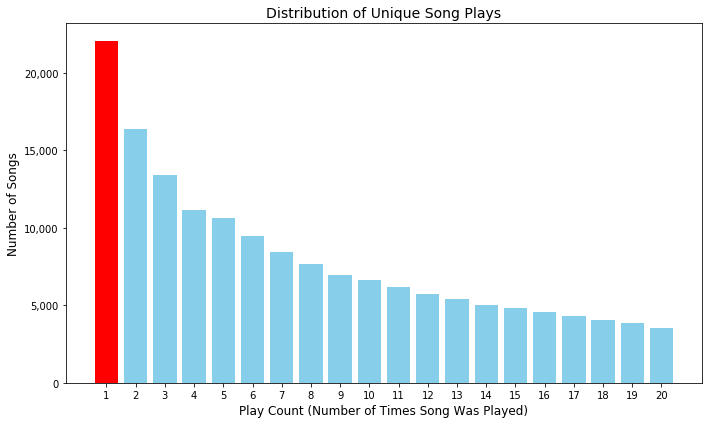

In [68]:
# Select the top 20 play counts
top_20_play_count_distribution = play_count_distribution_pd.head(20)

# Identify the maximum value in the 'Number_of_songs' column
max_value = top_20_play_count_distribution['Number_of_songs'].max()

# Create a color list where the bar with the maximum value is highlighted in red
colors = ['red' if val == max_value else 'skyblue' for val in top_20_play_count_distribution['Number_of_songs']]

# Plot the distribution using Matplotlib (limit to top 20)
plt.figure(figsize=(10, 6))
plt.bar(top_20_play_count_distribution['total_plays'], top_20_play_count_distribution['Number_of_songs'], color=colors)

# Add labels and title
plt.xlabel('Play Count (Number of Times Song Was Played)', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)
plt.title('Distribution of Unique Song Plays', fontsize=14)

# Set x-ticks 
plt.xticks(range(1, 21))  

# Set y-axis to display actual numbers instead of scientific notation
ax = plt.gca()  
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Show the plot
plt.tight_layout()
#plt.savefig('Distribution_Song_Plays.png', dpi=300, bbox_inches='tight')
plt.show()

### D. Visualize the distribution of song popularity and the distribution of user activity

#### D.1 Calculate the song popularity 

In [17]:
# Group by song_ID and count how many times each song is played
song_popularity = (triplets_data.groupBy('song_ID')
                   .agg(F.sum('play_count').alias('song_plays'))
                   .orderBy('song_plays', ascending=False))

# show the result 
show_as_html(song_popularity,5)

,song_ID,song_plays
0,SOBONKR12A58A7A7E0,726885.0
1,SOAUWYT12A81C206F1,648239.0
2,SOSXLTC12AF72A7F54,527893.0
3,SOFRQTD12A81C233C0,425463.0
4,SOEGIYH12A6D4FC0E3,389880.0


In [17]:
song_popularity.count()

384546

In [18]:
# Convert song popularity data to Pandas
song_popularity_df = song_popularity.toPandas()

#### D.2 Calcualate the user active distribution 

In [19]:
# Collect the counts of song plays per user
user_activity = (triplets_data.groupBy('user_ID')
                 .agg(F.sum('play_count').alias('user_plays'))
                 .orderBy('user_plays', ascending=False))

# show the result 
show_as_html(user_activity, 5)

,user_ID,user_plays
0,093cb74eb3c517c5179ae24caf0ebec51b24d2a2,13132.0
1,119b7c88d58d0c6eb051365c103da5caf817bea6,9884.0
2,3fa44653315697f42410a30cb766a4eb102080bb,8210.0
3,a2679496cd0af9779a92a13ff7c6af5c81ea8c7b,7015.0
4,d7d2d888ae04d16e994d6964214a1de81392ee04,6494.0


In [20]:
# count the number of active user play
user_activity.count()

1019318

In [20]:
# Convert user activity data to Pandas
user_activity_df = user_activity.toPandas()

In [29]:
total_users

1019318

#### D.3 Plot distribution of user active and song popularity 

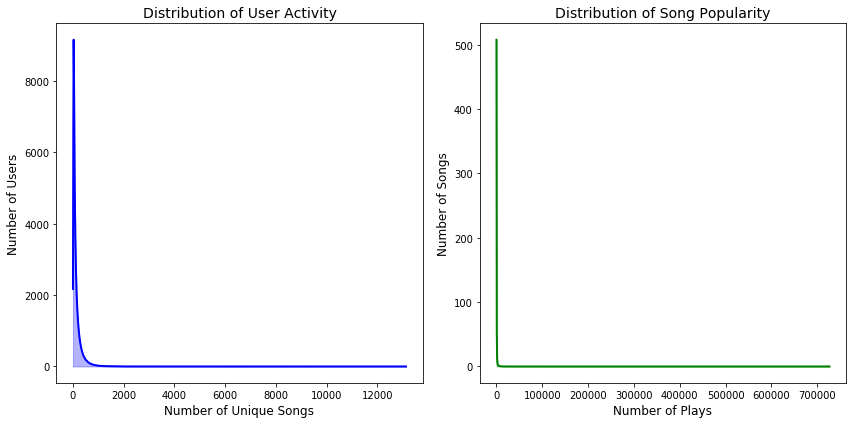

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Prepare data: user plays (replace with your actual data)
user_plays = user_activity_df['user_plays'].values
song_plays = song_popularity_df['song_plays'].values

# Number of users and songs (for scaling)
total_users = len(user_plays)
total_songs = len(song_plays)

# Calculate KDE for user plays
kde_user = gaussian_kde(user_plays)
x_user = np.linspace(0, user_plays.max(), 1000)  # Generate points on x-axis
y_user_scaled = kde_user(x_user) * total_users  # Scale KDE by total number of users

# Calculate KDE for song plays
kde_song = gaussian_kde(song_plays)
x_song = np.linspace(0, song_plays.max(), 1000)  # Generate points on x-axis
y_song_scaled = kde_song(x_song) * total_songs  # Scale KDE by total number of songs

# Create subplots: 1 row, 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot KDE for user activity on ax1
ax1.plot(x_user, y_user_scaled, color='blue', lw=2)  # KDE curve
ax1.fill_between(x_user, y_user_scaled, color='blue', alpha=0.3)  # Fill under curve
# Highlight the area where users have listened to fewer than 30 unique songs
x_shade_user = np.linspace(0, 30, 300)  # Range for shading (from 0 to 30 unique songs)
y_shade_user = kde_user(x_shade_user) * total_users  # Scale KDE for shading area


# Add labels, title and legend for user activity
ax1.set_xlabel('Number of Unique Songs', fontsize=12)
ax1.set_ylabel('Number of Users', fontsize=12)
ax1.set_title('Distribution of User Activity', fontsize=14)


# Plot KDE for song popularity on ax2
ax2.plot(x_song, y_song_scaled, color='green', lw=2)  # KDE curve
ax2.fill_between(x_song, y_song_scaled, color='green', alpha=0.3)  # Fill under curve
# Highlight the area where songs have fewer than 1000 plays
x_shade_song = np.linspace(0, 1000, 300)  # Range for shading (e.g., songs with fewer than 1000 plays)
y_shade_song = kde_song(x_shade_song) * total_songs  # Scale KDE for shading area


# Add labels, title and legend for song popularity
ax2.set_xlabel('Number of Plays', fontsize=12)
ax2.set_ylabel('Number of Songs', fontsize=12)
ax2.set_title('Distribution of Song Popularity', fontsize=14)


# Adjust layout and show both plots
plt.tight_layout()
#plt.savefig('Distribution_Songs&Users_KDE.png', dpi=300, bbox_inches='tight')
plt.show()

## Question 02

### A. Clean user - song plays dataset by filter out songs < N times and users < M 

#### A.1 Filter out the songs and user plays less than M & N

In order to develop a collaborative filtering we have to filter out song which have been played less than N (5) times and users who have listened fewer than M (10) times                     

In [22]:
# Choose M (number of unactive users) & N( number of song play less than N times)
N = 5
M = 10

In [44]:
# Filter out song with total plays less than or equal to N
song_less_than_5_times = (song_popularity.filter(F.col("song_plays") <= N).
                          orderBy("song_plays", ascending = False))

# show the result 
show_as_html(song_less_than_5_times, 5)

,song_ID,song_plays
0,SOHYLEY12A8C13F20D,5.0
1,SOTEVKG12AB01812E6,5.0
2,SOKWOGE12AB018B233,5.0
3,SOWIMFM12AB01830CB,5.0
4,SOCMROQ12AF72A1AF9,5.0


In [46]:
# Count the number of song play less than 5 times
song_less_than_5_times.count()

73704

In [52]:
# Filter out users who listen less than M(10) songs
users_less_then_10_songs = (user_activity.filter(F.col('user_plays') <= M).
                            orderBy('user_plays', ascending=True))

# Show the result 
show_as_html(users_less_then_10_songs,5)

,user_ID,user_plays
0,fe57c0cb58c35dfd7e14884ee8cf57e9e86275f3,10.0
1,bb2f6c0df988dd097ea4c612bdfa8b0daae5ec36,10.0
2,1545a894211a9d74b5701055d69ee5b9b25a665e,10.0
3,3c0fa2e8fbe8fc4b24787c365257b4bd67ff8b88,10.0
4,645b23c5c32a16f0dbee749b5686282651ff1767,10.0


In [53]:
# Count the number of users listen less than 10 songs 
users_less_then_10_songs.count()

6416

#### A.2 Create a clean dataset of user song plays after filter 

In [54]:
# filter out song less than 5 times and user listen less than 10 songs using anti join 
user_song_play = (triplets_data.
                 join(song_less_than_5_times, on = 'song_ID', how = "leftanti").
                 join(users_less_then_10_songs, on = 'user_ID', how = 'leftanti'))

# show the result 
show_as_html(user_song_play,5)

,user_ID,song_ID,play_count
0,00007f902e31b0693a023e9c234461d4e6991eec,SODZJCH12A8C132ADC,4
1,00007f902e31b0693a023e9c234461d4e6991eec,SOGPBAW12A6D4F9F22,3
2,00007f902e31b0693a023e9c234461d4e6991eec,SOSRJRK12AB0186FF4,1
3,00007f902e31b0693a023e9c234461d4e6991eec,SOTQUEC12AB01877F8,1
4,00007f902e31b0693a023e9c234461d4e6991eec,SOWYYUQ12A6701D68D,11


In [55]:
# Count the the number of user song remain 
user_song_play.count()

48157544

### B. Convert the user and song indetifier into integer indentifier in a consistent way 

In [56]:
# convert the user song play into numeric type 
user_song_play = user_song_play.withColumn("play_count", F.col("play_count").cast("int"))

user_song_play.printSchema()

root
 |-- user_ID: string (nullable = true)
 |-- song_ID: string (nullable = true)
 |-- play_count: integer (nullable = true)



### C. Split the dataset into training and testing set

In [61]:
# Create numeric indices for user and song IDs

user_label = StringIndexer(inputCol="user_ID", outputCol="user_ID_label")

song_label = StringIndexer(inputCol="song_ID", outputCol="song_ID_label")

pipeline = Pipeline(stages=[user_label, song_label])

# Fit and transform the dataset

user_song_play = pipeline.fit(user_song_play).transform(user_song_play)

# show the result 
show_as_html(user_song_play, 5)

,user_ID,song_ID,play_count,user_song_id,user_ID_label,song_ID_label
0,00007f902e31b0693a023e9c234461d4e6991eec,SOSRJRK12AB0186FF4,1,00007f902e31b0693a023e9c234461d4e6991eec_SOSRJ...,614048.0,770.0
1,00007f902e31b0693a023e9c234461d4e6991eec,SOTQUEC12AB01877F8,1,00007f902e31b0693a023e9c234461d4e6991eec_SOTQU...,614048.0,4285.0
2,00007f902e31b0693a023e9c234461d4e6991eec,SOITDGY12A8C1334DA,1,00007f902e31b0693a023e9c234461d4e6991eec_SOITD...,614048.0,5850.0
3,00007f902e31b0693a023e9c234461d4e6991eec,SOPUDWU12A8AE4612A,1,00007f902e31b0693a023e9c234461d4e6991eec_SOPUD...,614048.0,1206.0
4,00007f902e31b0693a023e9c234461d4e6991eec,SOKKFVZ12A58A7A8B0,1,00007f902e31b0693a023e9c234461d4e6991eec_SOKKF...,614048.0,21589.0


In [62]:
# Split the dataset into training and test sets (80-20)

training, test = user_song_play.randomSplit([0.8, 0.2])

training.cache()
test.cache()

DataFrame[user_ID: string, song_ID: string, play_count: int, user_song_id: string, user_ID_label: double, song_ID_label: double]

In [63]:
# Show the count of training and test sets

print(f"Training set count: {training.count()}")

print(f"Test set count: {test.count()}")

# Check the test set contains at least 20% of the plays

total_plays = user_song_play.count()

test_set_percentage = (test.count() / total_plays) * 100

print(f"Test set percentage: {test_set_percentage}%")

Training set count: 38526452
Test set count: 9631092
Test set percentage: 19.999134507357766%


In [64]:
# The sum of play_count for the training and test set

show_as_html(training.select(F.sum(F.col('play_count')).alias("train_play_count")))

show_as_html(test.select(F.sum(F.col('play_count')).alias("test_play_count")))

,train_play_count
0,110738590


,test_play_count
0,27684761


In [65]:
# Check users in the test set not have any interactions in the training set. 

check_non_interactions = (test.join(training, on = 'user_ID', how = 'leftanti'))

# Show the result 
show_as_html(check_non_interactions ,5)

,user_ID,song_ID,play_count,user_song_id,user_ID_label,song_ID_label


### D. Train an implicit matrix factorization model using ALS 

In [66]:
# Alternating Least Squares model 
als = ALS(maxIter = 5, regParam = 0.01, userCol = 'user_ID_label', itemCol = 'song_ID_label',
         ratingCol = 'play_count', implicitPrefs = True)

# Fit the model into the training data
alsModel = als.fit(training)

### E. Select a few of the users from the test set and generate recommendations using the model
### Compare these recommendations to the songs the user has actually played. 

#### E.1 Select a subset from test set and generate the reccomendations model 

In [69]:
# Choose a subset from the test set

subset_test = test.limit(200)

# Predict using the ALS model

als_pred = alsModel.transform(subset_test)

als_pred.cache()  

# View the schema and the first few rows of predictions 

# show the result 
als_pred.printSchema()
show_as_html(als_pred)

root
 |-- user_ID: string (nullable = true)
 |-- song_ID: string (nullable = true)
 |-- play_count: integer (nullable = true)
 |-- user_song_id: string (nullable = true)
 |-- user_ID_label: double (nullable = false)
 |-- song_ID_label: double (nullable = false)
 |-- prediction: float (nullable = false)



,user_ID,song_ID,play_count,user_song_id,user_ID_label,song_ID_label,prediction
0,0037d85676c219d60a6e3decd15830893b367c07,SOUVTSM12AC468F6A7,1,0037d85676c219d60a6e3decd15830893b367c07_SOUVT...,159922.0,12.0,0.085745
1,00368d7eab249b14d7a2eba2855949d5c836e40a,SODWXJW12AAA8C5C29,29,00368d7eab249b14d7a2eba2855949d5c836e40a_SODWX...,225025.0,273.0,0.281732
2,0037d85676c219d60a6e3decd15830893b367c07,SOALJAA12A6702085C,2,0037d85676c219d60a6e3decd15830893b367c07_SOALJ...,159922.0,641.0,0.045474
3,000efb1c53ac30cff4574caa2732d134c849c25a,SOCPROP12A8C1336EE,29,000efb1c53ac30cff4574caa2732d134c849c25a_SOCPR...,840304.0,1580.0,0.027723
4,0023d50b3c99c4352585408b1b21f3762655f434,SOFORTS12A58A7D916,4,0023d50b3c99c4352585408b1b21f3762655f434_SOFOR...,462057.0,12576.0,0.002075
5,00194822e7a5f690e3b9ec74349411860cc31232,SOJYJOK12B0B8084DE,1,00194822e7a5f690e3b9ec74349411860cc31232_SOJYJ...,740875.0,14765.0,0.000250
6,002d5a04b400590b8568cfea1850c55dde778090,SOFPHNS12AB017C042,1,002d5a04b400590b8568cfea1850c55dde778090_SOFPH...,402884.0,34391.0,0.001837
7,0030bfca05740e85c303c7b0ba73e7a80670f7eb,SOTTYCW12A6D4F7B78,1,0030bfca05740e85c303c7b0ba73e7a80670f7eb_SOTTY...,216281.0,40505.0,0.000217
8,003a74775bf18a5e3b0719de1281f891db0e6f95,SOGVLXS12AB017DCC0,1,003a74775bf18a5e3b0719de1281f891db0e6f95_SOGVL...,17258.0,53963.0,0.001156
9,00368d7eab249b14d7a2eba2855949d5c836e40a,SOUJSAW12AB0181CC6,1,00368d7eab249b14d7a2eba2855949d5c836e40a_SOUJS...,225025.0,119738.0,0.000298


#### E.2 Generate the recommendation with top 10 recommendation for each users 

In stead of calcualte the RMSE or MSE, for the recommendation task it would be more useful to perform the ranking metrics which will rank the items for per user. 

Since we might have million of users and items, we dont want to fill in the entire matrix, it would be too much memory and we dont need that. Hence, we are going to use only top 10 recommend items per user.                                 

In [70]:
# Generate the recommendation 
k = 10 

recommendations = alsModel.recommendForAllUsers(k)

# Show the output 
recommendations.printSchema()
show_as_html(recommendations)

root
 |-- user_ID_label: integer (nullable = false)
 |-- recommendations: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- song_ID_label: integer (nullable = true)
 |    |    |-- rating: float (nullable = true)



,user_ID_label,recommendations
0,12,"[(178, 0.383200466632843), (106, 0.35155665874..."
1,18,"[(0, 1.5281906127929688), (15, 1.2841781377792..."
2,38,"[(112, 0.42549845576286316), (63, 0.3830904662..."
3,70,"[(58, 0.9972134828567505), (63, 0.991468727588..."
4,93,"[(0, 0.5334450602531433), (178, 0.480286210775..."
5,190,"[(2, 0.6481819152832031), (58, 0.5332970619201..."
6,218,"[(106, 0.6811973452568054), (93, 0.64179486036..."
7,273,"[(2, 0.6413710713386536), (106, 0.472035765647..."
8,300,"[(63, 0.4187141954898834), (58, 0.413176596164..."
9,340,"[(106, 0.37911638617515564), (236, 0.376150667..."


### E.3 Compare these recommendations to the songs the user has actually played

In [72]:
# Collect and sort relevant items from test in order of descending relevance
relevant = (
    subset_test
    .groupBy("user_ID_label")
    .agg(
        F.reverse(F.sort_array(F.collect_list(
            F.struct(
                F.col("play_count"),
                F.col("song_ID_label"),
            )
        ))).alias("actual_plays")
    )
)
relevant.printSchema()
show_as_html(relevant)

root
 |-- user_ID_label: double (nullable = false)
 |-- actual_plays: array (nullable = false)
 |    |-- element: struct (containsNull = false)
 |    |    |-- play_count: integer (nullable = true)
 |    |    |-- song_ID_label: double (nullable = false)



,user_ID_label,actual_plays
0,685323.0,"[(2, 4516.0), (1, 29315.0), (1, 10206.0), (1, ..."
1,573807.0,"[(11, 575.0), (10, 58.0), (8, 1975.0), (5, 298..."
2,392486.0,"[(6, 57178.0), (2, 11696.0), (2, 1901.0), (1, ..."
3,771709.0,"[(2, 230227.0), (2, 3798.0), (1, 29353.0), (1,..."
4,402877.0,"[(11, 1.0), (2, 73.0), (1, 755.0), (1, 221.0),..."
5,967368.0,"[(8, 1065.0), (8, 15.0), (3, 204863.0)]"
6,115475.0,"[(17, 277409.0), (7, 196471.0), (7, 192670.0),..."
7,14448.0,"[(6, 19097.0), (5, 4040.0), (2, 24402.0), (1, ..."
8,685329.0,"[(4, 7638.0), (3, 8.0), (1, 47792.0), (1, 3865..."
9,712212.0,"[(3, 144.0), (2, 7066.0), (1, 527.0)]"


In [73]:
# Merge recommendations and relevant items so they can be compared
comparision = (
    recommendations.select(
        F.col("user_ID_label"),
        F.col("recommendations.song_ID_label").alias("recommendations").astype(ArrayType(DoubleType())),
    )
    .join(
        relevant.select(
            F.col("user_ID_label"),
            F.col("actual_plays.song_ID_label").alias("actual_plays").astype(ArrayType(DoubleType())),
        ),
        on="user_ID_label",
        how="inner"
    )
)
comparision.cache()

comparision.printSchema()
show_as_html(comparision)

root
 |-- user_ID_label: integer (nullable = false)
 |-- recommendations: array (nullable = true)
 |    |-- element: double (containsNull = true)
 |-- actual_plays: array (nullable = false)
 |    |-- element: double (containsNull = true)



,user_ID_label,recommendations,actual_plays
0,659898,"[3.0, 1.0, 4.0, 6.0, 28.0, 0.0, 2.0, 5.0, 27.0...","[50.0, 4.0, 7218.0, 18.0]"
1,840307,"[29.0, 73.0, 96.0, 125.0, 141.0, 174.0, 133.0,...","[221.0, 141.0]"
2,685326,"[0.0, 8.0, 7.0, 5.0, 98.0, 20.0, 22.0, 3.0, 10...","[15.0, 124.0, 26.0]"
3,475827,"[0.0, 5.0, 2.0, 3.0, 4.0, 8.0, 1.0, 13.0, 7.0,...","[121003.0, 202483.0, 163163.0, 148476.0, 14221..."
4,685332,"[15.0, 101.0, 19.0, 38.0, 65.0, 61.0, 6.0, 80....",[536.0]
5,921218,"[0.0, 2.0, 5.0, 8.0, 13.0, 7.0, 11.0, 16.0, 4....","[219469.0, 20576.0]"
6,840306,"[0.0, 3.0, 5.0, 1.0, 4.0, 2.0, 8.0, 7.0, 28.0,...","[6812.0, 69.0]"
7,573811,"[38.0, 15.0, 19.0, 65.0, 89.0, 152.0, 117.0, 3...","[4025.0, 19576.0, 10088.0, 2432.0]"
8,2033,"[65.0, 38.0, 238.0, 89.0, 98.0, 15.0, 259.0, 1...","[7321.0, 23257.0, 236152.0, 109426.0, 87983.0,..."
9,182240,"[98.0, 168.0, 379.0, 116.0, 553.0, 97.0, 808.0...","[115614.0, 31565.0, 684.0, 210.0, 31254.0, 163..."


In [75]:
# Finding the intersection of recommendations and actual plays
comparision = comparision.withColumn('common_elements', F.array_intersect('recommendations', 'actual_plays'))

# Show the result
show_as_html(comparision)

,user_ID_label,recommendations,actual_plays,common_elements
0,659898,"[3.0, 1.0, 4.0, 6.0, 28.0, 0.0, 2.0, 5.0, 27.0...","[50.0, 4.0, 7218.0, 18.0]",[4.0]
1,840307,"[29.0, 73.0, 96.0, 125.0, 141.0, 174.0, 133.0,...","[221.0, 141.0]","[141.0, 221.0]"
2,685326,"[0.0, 8.0, 7.0, 5.0, 98.0, 20.0, 22.0, 3.0, 10...","[15.0, 124.0, 26.0]",[]
3,475827,"[0.0, 5.0, 2.0, 3.0, 4.0, 8.0, 1.0, 13.0, 7.0,...","[121003.0, 202483.0, 163163.0, 148476.0, 14221...",[]
4,685332,"[15.0, 101.0, 19.0, 38.0, 65.0, 61.0, 6.0, 80....",[536.0],[]
5,921218,"[0.0, 2.0, 5.0, 8.0, 13.0, 7.0, 11.0, 16.0, 4....","[219469.0, 20576.0]",[]
6,840306,"[0.0, 3.0, 5.0, 1.0, 4.0, 2.0, 8.0, 7.0, 28.0,...","[6812.0, 69.0]",[]
7,573811,"[38.0, 15.0, 19.0, 65.0, 89.0, 152.0, 117.0, 3...","[4025.0, 19576.0, 10088.0, 2432.0]",[]
8,2033,"[65.0, 38.0, 238.0, 89.0, 98.0, 15.0, 259.0, 1...","[7321.0, 23257.0, 236152.0, 109426.0, 87983.0,...",[]
9,182240,"[98.0, 168.0, 379.0, 116.0, 553.0, 97.0, 808.0...","[115614.0, 31565.0, 684.0, 210.0, 31254.0, 163...",[]


### F. Use the test set of user-song plays and recommendations compute Precision @ 10, NDCG @ 10, MAP 

In [78]:
# Metrics
K = 10

evaluator = RankingEvaluator(predictionCol="recommendations", labelCol="actual_plays")

precisionAtK = evaluator.evaluate(comparision, {evaluator.metricName: "precisionAtK",            evaluator.k: K})
mapAtK       = evaluator.evaluate(comparision, {evaluator.metricName: "meanAveragePrecisionAtK", evaluator.k: K})
ndcgAtK      = evaluator.evaluate(comparision, {evaluator.metricName: "ndcgAtK",                 evaluator.k: K})

print(f'metrics for implicit feedback')
print(f'')
print(f'precision @ K: {precisionAtK:.5f}')
print(f'MAP @ K:       {mapAtK:.5f}')
print(f'NDCG @ K:      {ndcgAtK:.5f}')
print(f'')

metrics for implicit feedback

precision @ K: 0.02857
MAP @ K:       0.02817
NDCG @ K:      0.05979



In [6]:
# Run this cell before closing the notebook or kill your spark application by hand using the link in the Spark UI

stop_spark()